<a href="https://www.kaggle.com/code/neenues/steelplatedefectprediction-catboostclassifier" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# [Steel Plate Defect Prediction](https://www.kaggle.com/competitions/playground-series-s4e3)
### Playground Series - Season 4, Episode 3.
_______________________________________________________________________ 
# Author Details:
- Name: Neenu E S
- Profiles: [Github](https://github.com/neenu05) | [LinkedIn](https://www.linkedin.com/in/neenues/) | [Kaggle](https://www.kaggle.com/neenues)
- Prepared for the submission to the competition.
________________________________________________________________________
# Attributions:
[Walter Reade, Ashley Chow. (2024). Steel Plate Defect Prediction. Kaggle.]

(https://kaggle.com/competitions/playground-series-s4e3)
__________________________________________________________________________
# Code Execution : 
- [Execute the notebook in Kaggle](https://www.kaggle.com/code/neenues/steelplatedefectprediction-catboostclassifier/edit/run/169469592)

#### Import all necessary libraries

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
plt.style.use('ggplot')
from mlxtend.plotting import plot_confusion_matrix
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)
warnings.filterwarnings("ignore")
import plotly.figure_factory as ff
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.metrics import roc_curve, auc, roc_auc_score, accuracy_score
from sklearn.pipeline import make_pipeline

##### Lets Explore the data

In [3]:
train = pd.read_csv('train.csv')
train.head()

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,0,584,590,909972,909977,16,8,5,2274,113,...,-0.5000,-0.0104,0.1417,0,0,0,1,0,0,0
1,1,808,816,728350,728372,433,20,54,44478,70,...,0.7419,-0.2997,0.9491,0,0,0,0,0,0,1
2,2,39,192,2212076,2212144,11388,705,420,1311391,29,...,-0.0105,-0.0944,1.0000,0,0,1,0,0,0,0
3,3,781,789,3353146,3353173,210,16,29,3202,114,...,0.6667,-0.0402,0.4025,0,0,1,0,0,0,0
4,4,1540,1560,618457,618502,521,72,67,48231,82,...,0.9158,-0.2455,0.9998,0,0,0,0,0,0,1


In [4]:
train.drop(['id'], axis = 1, inplace=True)

In [5]:
train.shape

(19219, 34)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19219 entries, 0 to 19218
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   X_Minimum              19219 non-null  int64  
 1   X_Maximum              19219 non-null  int64  
 2   Y_Minimum              19219 non-null  int64  
 3   Y_Maximum              19219 non-null  int64  
 4   Pixels_Areas           19219 non-null  int64  
 5   X_Perimeter            19219 non-null  int64  
 6   Y_Perimeter            19219 non-null  int64  
 7   Sum_of_Luminosity      19219 non-null  int64  
 8   Minimum_of_Luminosity  19219 non-null  int64  
 9   Maximum_of_Luminosity  19219 non-null  int64  
 10  Length_of_Conveyer     19219 non-null  int64  
 11  TypeOfSteel_A300       19219 non-null  int64  
 12  TypeOfSteel_A400       19219 non-null  int64  
 13  Steel_Plate_Thickness  19219 non-null  int64  
 14  Edges_Index            19219 non-null  float64
 15  Em

In [7]:
#Checking the dataset description
train.describe().T
# describe.transpose()

,count,mean,std,min,25%,50%,75%,max
X_Minimum,19219.0,7.098547e+02,5.315442e+02,0.0000,49.00000,7.770000e+02,1.152000e+03,1.705000e+03
X_Maximum,19219.0,7.538576e+02,4.998366e+02,4.0000,214.00000,7.960000e+02,1.165000e+03,1.713000e+03
Y_Minimum,19219.0,1.849756e+06,1.903554e+06,6712.0000,657468.00000,1.398169e+06,2.368032e+06,1.298766e+07
Y_Maximum,19219.0,1.846605e+06,1.896295e+06,6724.0000,657502.00000,1.398179e+06,2.362511e+06,1.298769e+07
Pixels_Areas,19219.0,1.683988e+03,3.730320e+03,6.0000,89.00000,1.680000e+02,6.530000e+02,1.526550e+05
X_Perimeter,19219.0,9.565466e+01,1.778214e+02,2.0000,15.00000,2.500000e+01,6.400000e+01,7.553000e+03
Y_Perimeter,19219.0,6.412410e+01,1.010542e+02,1.0000,14.00000,2.300000e+01,6.100000e+01,9.030000e+02
Sum_of_Luminosity,19219.0,1.918467e+05,4.420247e+05,250.0000,9848.00000,1.823800e+04,6.797800e+04,1.159141e+07
Minimum_of_Luminosity,19219.0,8.480842e+01,2.880034e+01,0.0000,70.00000,9.000000e+01,1.050000e+02,1.960000e+02
Maximum_of_Luminosity,19219.0,1.286474e+02,1.419698e+01,39.0000,124.00000,1.270000e+02,1.350000e+02,2.530000e+02


In [8]:
train_col = train.columns.tolist()
train_col

['X_Minimum',
 'X_Maximum',
 'Y_Minimum',
 'Y_Maximum',
 'Pixels_Areas',
 'X_Perimeter',
 'Y_Perimeter',
 'Sum_of_Luminosity',
 'Minimum_of_Luminosity',
 'Maximum_of_Luminosity',
 'Length_of_Conveyer',
 'TypeOfSteel_A300',
 'TypeOfSteel_A400',
 'Steel_Plate_Thickness',
 'Edges_Index',
 'Empty_Index',
 'Square_Index',
 'Outside_X_Index',
 'Edges_X_Index',
 'Edges_Y_Index',
 'Outside_Global_Index',
 'LogOfAreas',
 'Log_X_Index',
 'Log_Y_Index',
 'Orientation_Index',
 'Luminosity_Index',
 'SigmoidOfAreas',
 'Pastry',
 'Z_Scratch',
 'K_Scatch',
 'Stains',
 'Dirtiness',
 'Bumps',
 'Other_Faults']

In [9]:
train.isnull().sum()

X_Minimum                0
X_Maximum                0
Y_Minimum                0
Y_Maximum                0
Pixels_Areas             0
X_Perimeter              0
Y_Perimeter              0
Sum_of_Luminosity        0
Minimum_of_Luminosity    0
Maximum_of_Luminosity    0
Length_of_Conveyer       0
TypeOfSteel_A300         0
TypeOfSteel_A400         0
Steel_Plate_Thickness    0
Edges_Index              0
Empty_Index              0
Square_Index             0
Outside_X_Index          0
Edges_X_Index            0
Edges_Y_Index            0
Outside_Global_Index     0
LogOfAreas               0
Log_X_Index              0
Log_Y_Index              0
Orientation_Index        0
Luminosity_Index         0
SigmoidOfAreas           0
Pastry                   0
Z_Scratch                0
K_Scatch                 0
Stains                   0
Dirtiness                0
Bumps                    0
Other_Faults             0
dtype: int64

In [10]:
train.nunique()

X_Minimum                1191
X_Maximum                1259
Y_Minimum                3345
Y_Maximum                3341
Pixels_Areas             1154
X_Perimeter               460
Y_Perimeter               331
Sum_of_Luminosity        2595
Minimum_of_Luminosity     162
Maximum_of_Luminosity      98
Length_of_Conveyer         99
TypeOfSteel_A300            2
TypeOfSteel_A400            2
Steel_Plate_Thickness      27
Edges_Index              1849
Empty_Index              1748
Square_Index             1118
Outside_X_Index           525
Edges_X_Index            1102
Edges_Y_Index             900
Outside_Global_Index        4
LogOfAreas               1072
Log_X_Index               206
Log_Y_Index               241
Orientation_Index        1598
Luminosity_Index         2046
SigmoidOfAreas            467
Pastry                      2
Z_Scratch                   2
K_Scatch                    2
Stains                      2
Dirtiness                   2
Bumps                       2
Other_Faul

In [11]:
target_col = train_col[-7:]
target_col

['Pastry',
 'Z_Scratch',
 'K_Scatch',
 'Stains',
 'Dirtiness',
 'Bumps',
 'Other_Faults']

In [12]:
target_df = train.iloc[:,-7:]
target_df.shape

(19219, 7)

In [13]:
target_df.head()

,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,0,0,0,0,1


In [14]:
###Extract the labels form the dataframe
labels = []
for index, row in train.iterrows():
    labels.append(list(row.iloc[-7:]))
    
print(np.array(labels).shape) ## convert list labels to array  === np.array(labels)


(19219, 7)


In [15]:
train_df = train.iloc[:,:-7]
train_df.shape

(19219, 27)

In [16]:
## value_count in train_df

for i in train_df.columns:
    print ("--------------- %s ----------------" % i)
    print(train_df[i].value_counts())
#     plt.figure(i)
#     sns.histplot(data = train_df ,x = train_df[i], color = 'orange',
#              edgecolor = 'linen', bins = 5)

--------------- X_Minimum ----------------
X_Minimum
39      1601
41      1489
0        326
1325     155
1065     148
        ... 
181        1
76         1
632        1
887        1
792        1
Name: count, Length: 1191, dtype: int64
--------------- X_Maximum ----------------
X_Maximum
214     376
216     374
212     360
218     232
1332    177
       ... 
1247      1
241       1
148       1
1250      1
1657      1
Name: count, Length: 1259, dtype: int64
--------------- Y_Minimum ----------------
Y_Minimum
1740121    53
879259     50
1786253    47
5851552    43
7754878    43
           ..
1559784     1
236280      1
835870      1
1064602     1
143210      1
Name: count, Length: 3345, dtype: int64
--------------- Y_Maximum ----------------
Y_Maximum
1740188    53
879265     50
1786320    47
2887114    44
7754931    42
           ..
1862979     1
397720      1
1633491     1
2358272     1
1445996     1
Name: count, Length: 3341, dtype: int64
--------------- Pixels_Areas ----------------

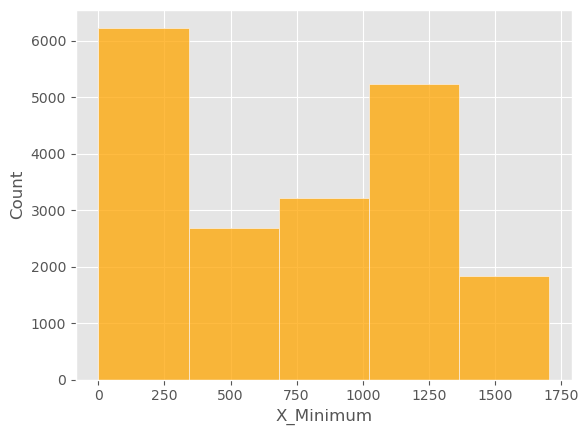

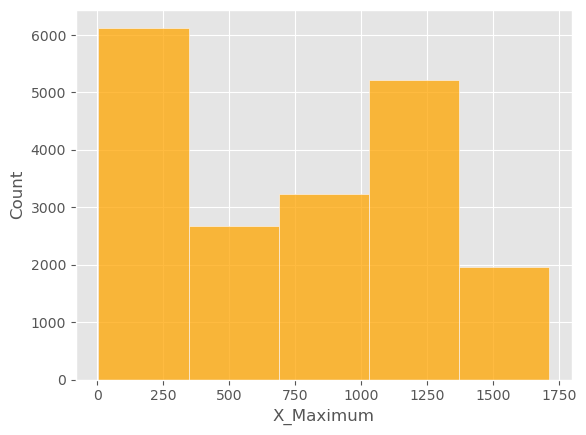

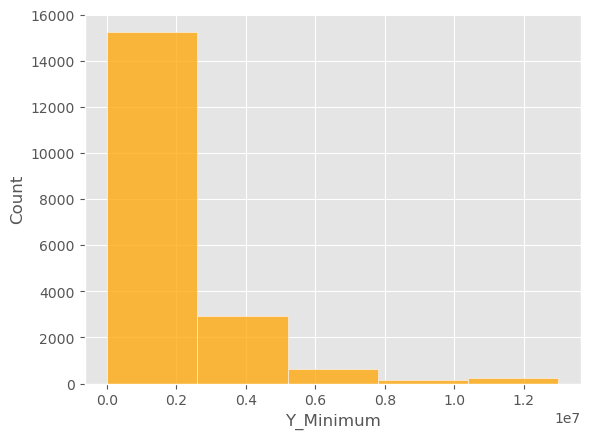

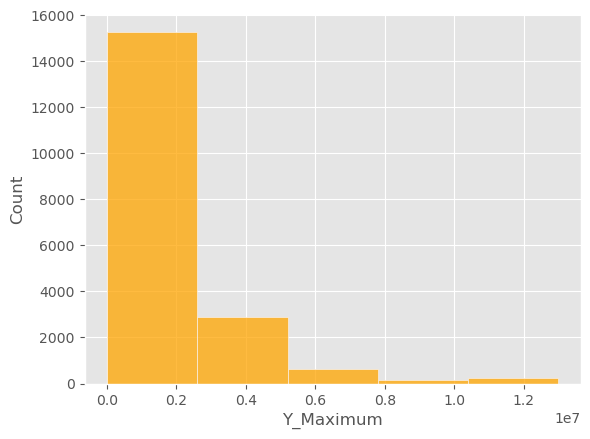

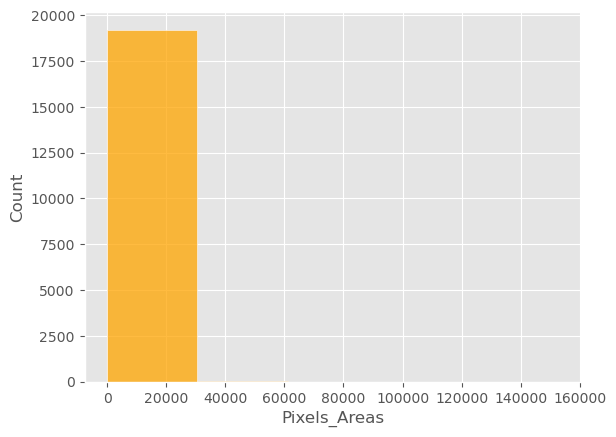

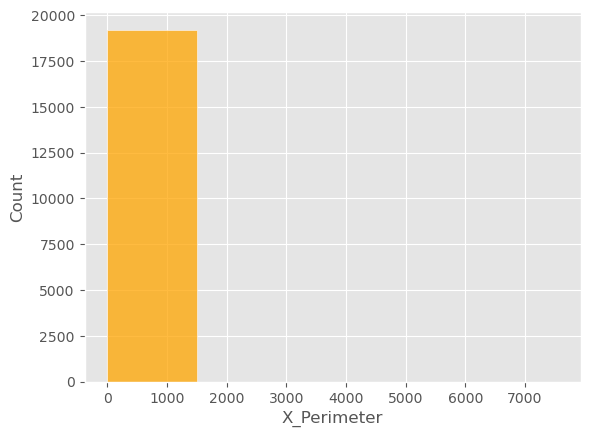

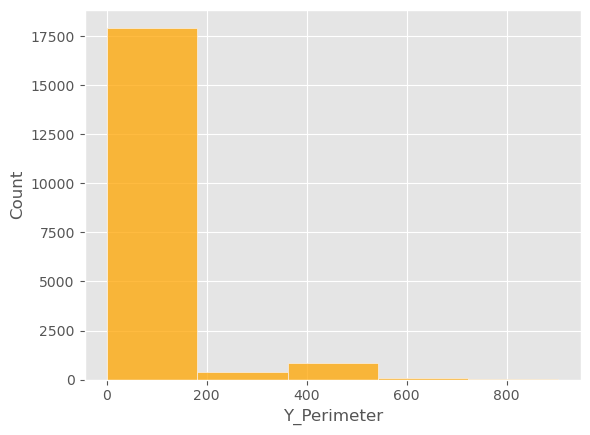

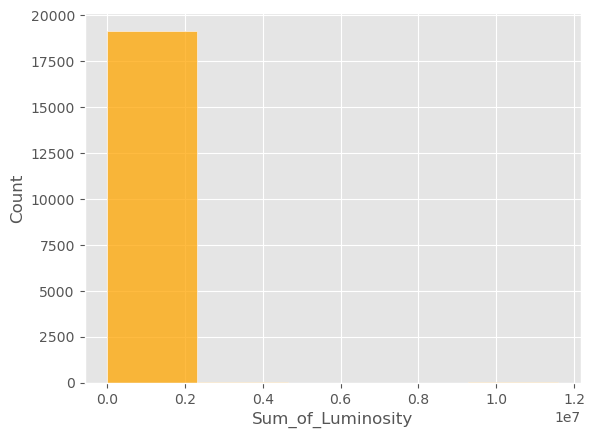

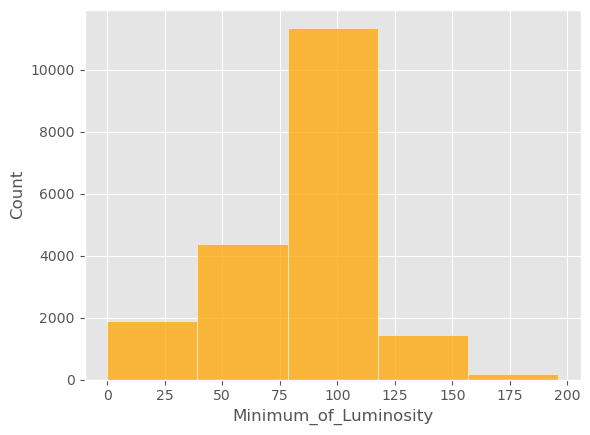

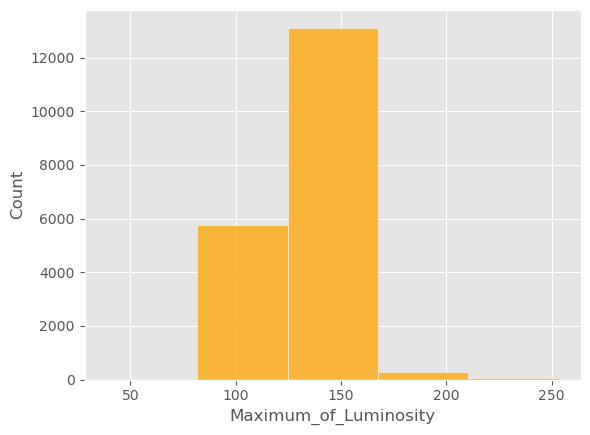

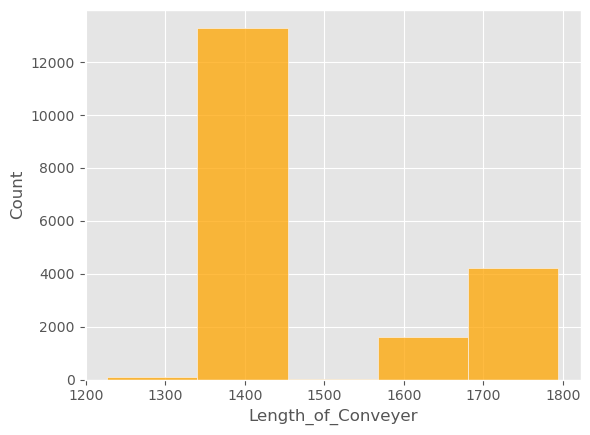

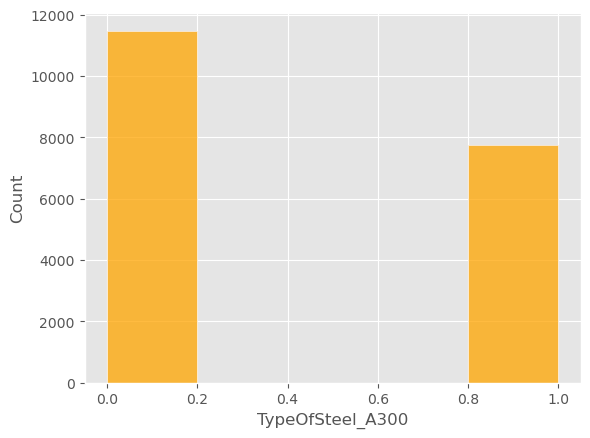

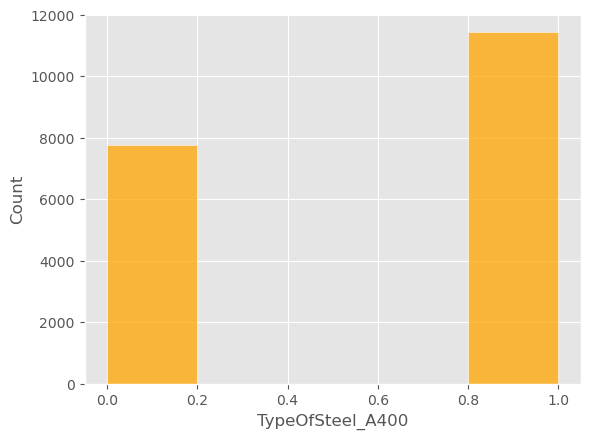

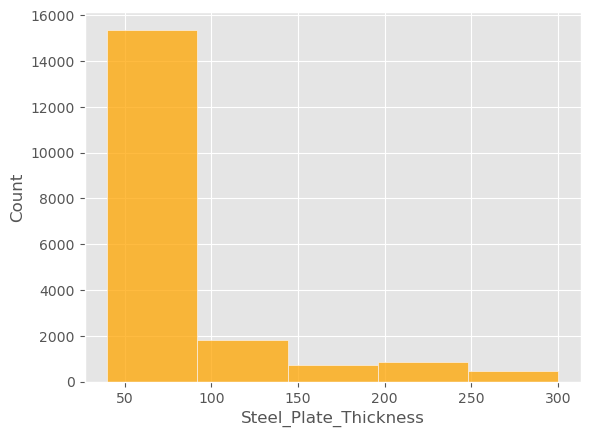

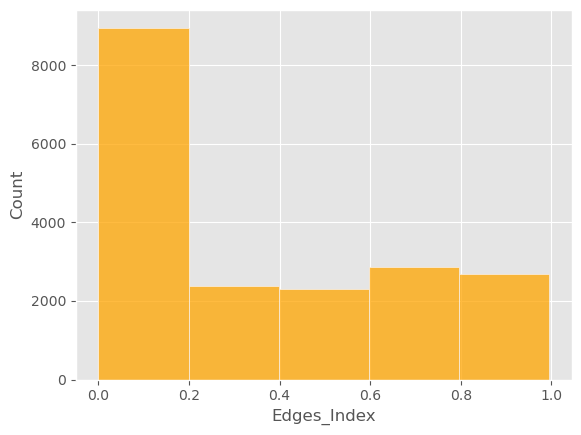

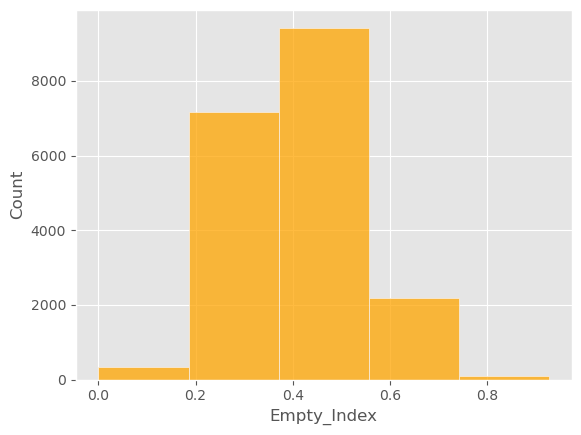

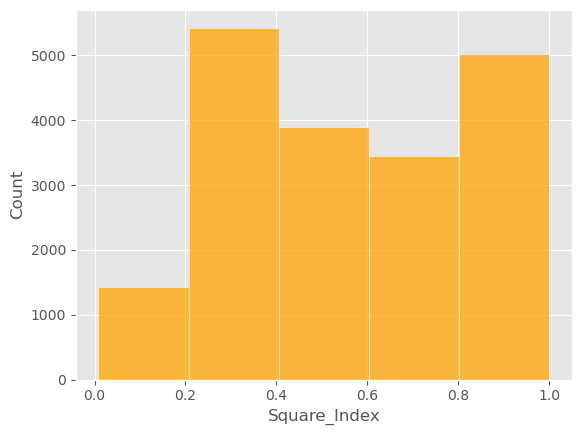

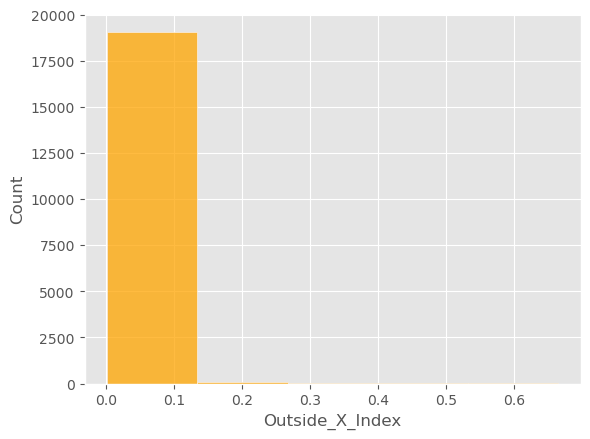

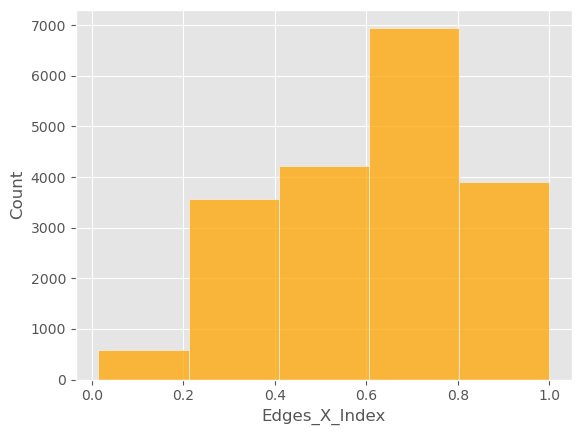

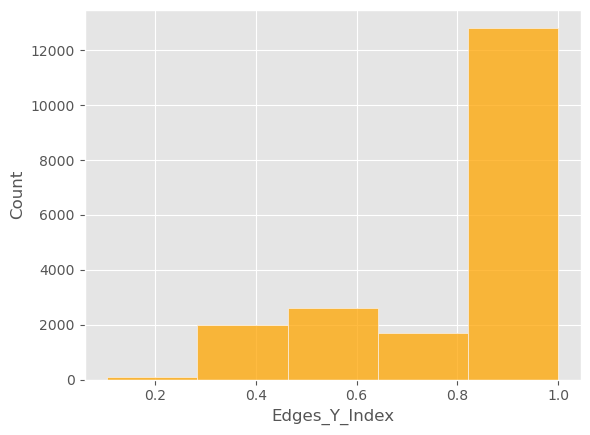

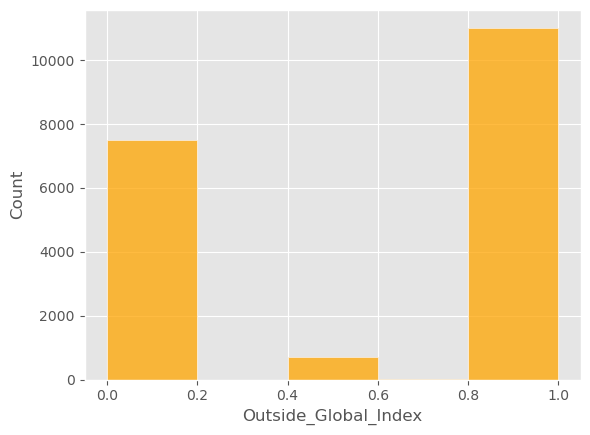

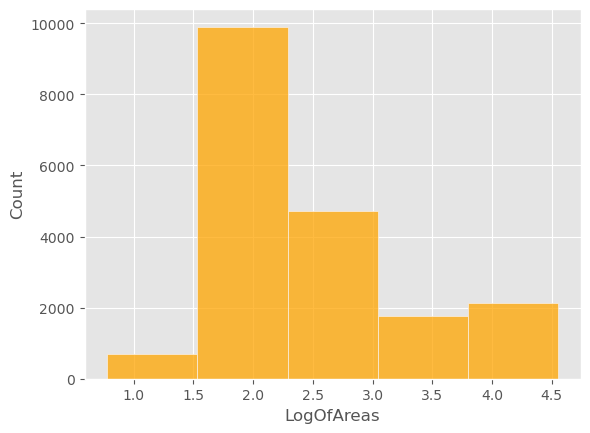

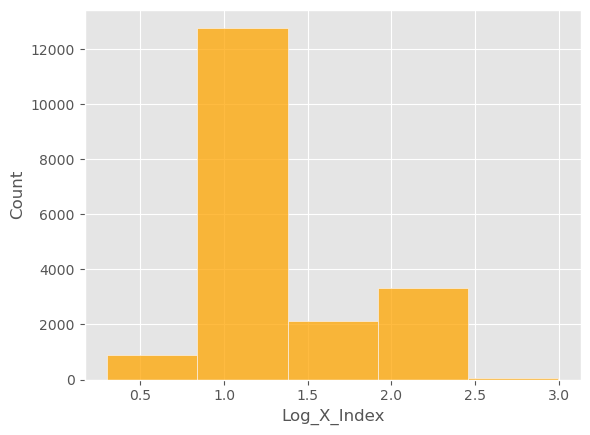

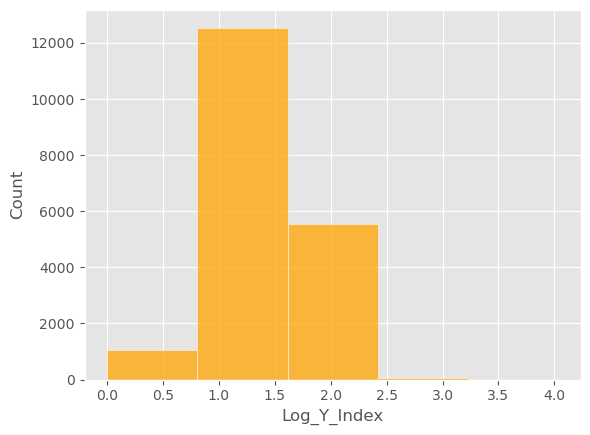

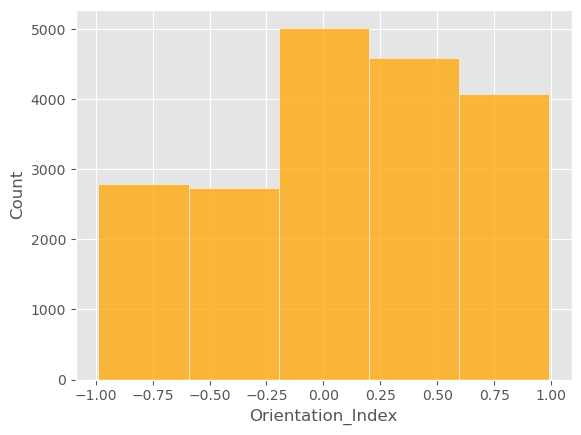

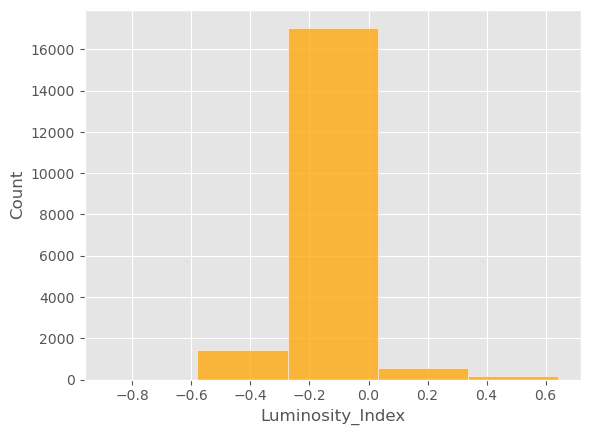

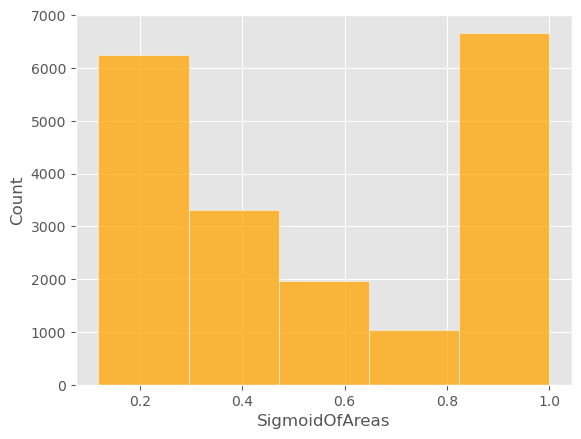

In [17]:
## Plot the value_counts in train_df

for i in train_df.columns:
#     print ("--------------- %s ----------------" % i)
#     print(train_df[i].value_counts())
    plt.figure(i)
    sns.histplot(data = train_df ,x = train_df[i], color = 'orange',
             edgecolor = 'linen', bins = 5)

In [18]:
## value_count in targest_df

for i in target_df.columns:
    print ("--------------- %s ----------------" % i)
    print(target_df[i].value_counts())


--------------- Pastry ----------------
Pastry
0    17753
1     1466
Name: count, dtype: int64
--------------- Z_Scratch ----------------
Z_Scratch
0    18069
1     1150
Name: count, dtype: int64
--------------- K_Scatch ----------------
K_Scatch
0    15787
1     3432
Name: count, dtype: int64
--------------- Stains ----------------
Stains
0    18651
1      568
Name: count, dtype: int64
--------------- Dirtiness ----------------
Dirtiness
0    18734
1      485
Name: count, dtype: int64
--------------- Bumps ----------------
Bumps
0    14456
1     4763
Name: count, dtype: int64
--------------- Other_Faults ----------------
Other_Faults
0    12661
1     6558
Name: count, dtype: int64


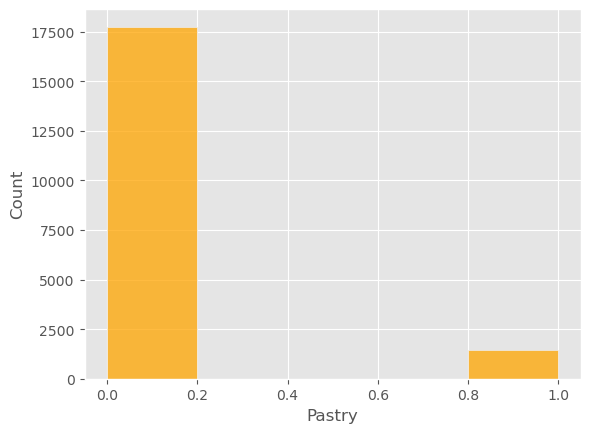

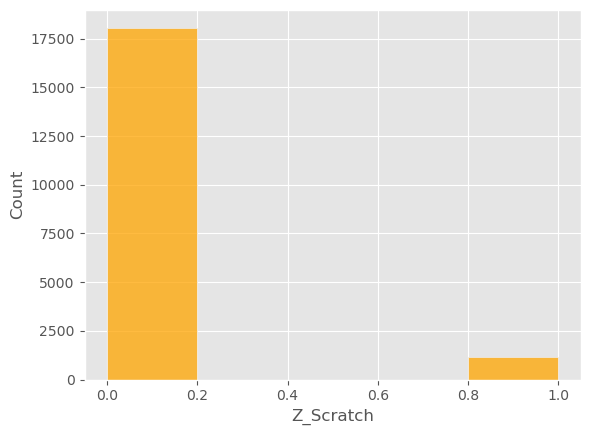

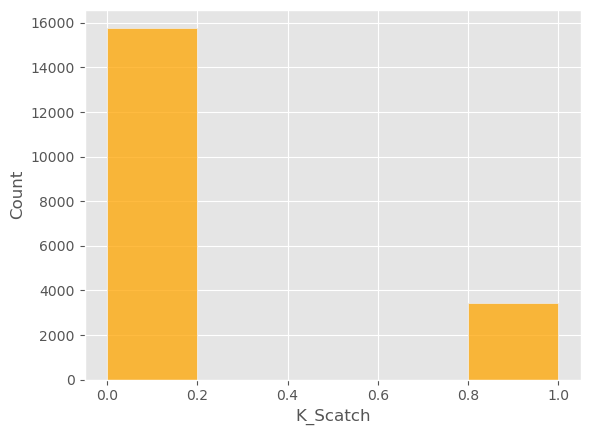

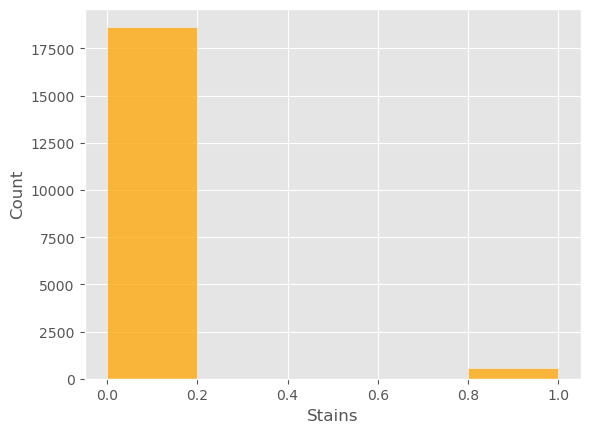

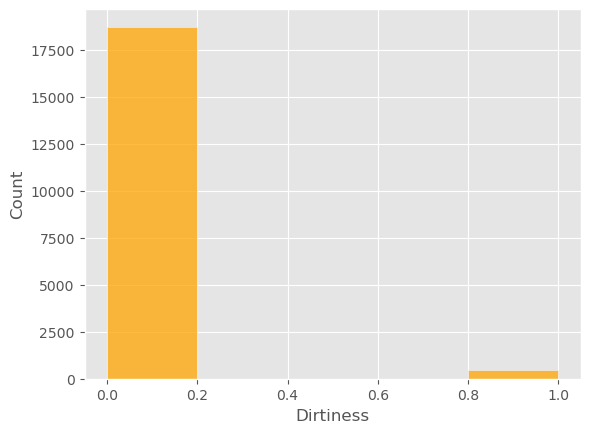

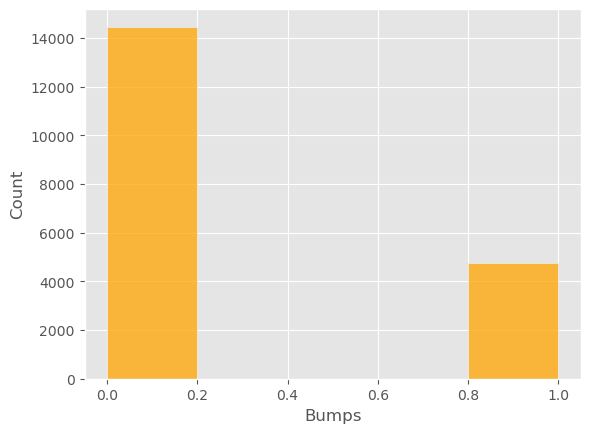

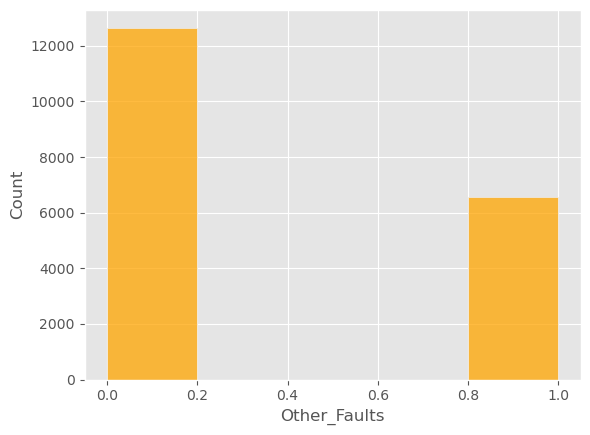

In [19]:
## Plot value_counts in targest_df
    
for i in target_df.columns:

    plt.figure(i)
    sns.histplot(data = target_df ,x = target_df[i], color = 'orange', bins = 5)

#### Training the dataset

In [20]:
X=train_df 
y=target_df

## since both train_dff and target_df has only the columns that are required remaining where removed.

In [21]:
X.shape, y.shape

((19219, 27), (19219, 7))

In [22]:
#Data Modeling
#Train Test Split

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=2)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(15375, 27) (3844, 27) (15375, 7) (3844, 7)


In [23]:
# Standardize the features
print("Standardizing features...")
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
print("Features standardized successfully.")


Standardizing features...
Features standardized successfully.


In [24]:
roc_accuracy = []
avg_roc_accuracy =[]
avg_accuracy = []
accuracy_scores  = []
models = {}

Training CatBoost Classifier models...
Learning rate set to 0.033091
0:	learn: 0.6459363	total: 177ms	remaining: 2m 56s
1:	learn: 0.5985101	total: 183ms	remaining: 1m 31s
2:	learn: 0.5631030	total: 189ms	remaining: 1m 2s
3:	learn: 0.5226116	total: 195ms	remaining: 48.4s
4:	learn: 0.4902566	total: 201ms	remaining: 39.9s
5:	learn: 0.4681006	total: 207ms	remaining: 34.2s
6:	learn: 0.4473855	total: 213ms	remaining: 30.2s
7:	learn: 0.4297268	total: 220ms	remaining: 27.2s
8:	learn: 0.4124092	total: 226ms	remaining: 24.9s
9:	learn: 0.3927677	total: 232ms	remaining: 22.9s
10:	learn: 0.3771224	total: 238ms	remaining: 21.4s
11:	learn: 0.3625539	total: 244ms	remaining: 20.1s
12:	learn: 0.3472226	total: 250ms	remaining: 19s
13:	learn: 0.3362543	total: 256ms	remaining: 18s
14:	learn: 0.3283496	total: 262ms	remaining: 17.2s
15:	learn: 0.3188047	total: 268ms	remaining: 16.5s
16:	learn: 0.3070819	total: 273ms	remaining: 15.8s
17:	learn: 0.2973282	total: 279ms	remaining: 15.2s
18:	learn: 0.2896617	tota

180:	learn: 0.1788469	total: 1.2s	remaining: 5.42s
181:	learn: 0.1787743	total: 1.2s	remaining: 5.41s
182:	learn: 0.1786034	total: 1.21s	remaining: 5.41s
183:	learn: 0.1785415	total: 1.22s	remaining: 5.4s
184:	learn: 0.1784402	total: 1.22s	remaining: 5.39s
185:	learn: 0.1783046	total: 1.23s	remaining: 5.38s
186:	learn: 0.1781912	total: 1.23s	remaining: 5.37s
187:	learn: 0.1780982	total: 1.24s	remaining: 5.36s
188:	learn: 0.1779859	total: 1.25s	remaining: 5.34s
189:	learn: 0.1778435	total: 1.25s	remaining: 5.33s
190:	learn: 0.1776756	total: 1.26s	remaining: 5.32s
191:	learn: 0.1775316	total: 1.26s	remaining: 5.31s
192:	learn: 0.1774548	total: 1.27s	remaining: 5.3s
193:	learn: 0.1773544	total: 1.27s	remaining: 5.29s
194:	learn: 0.1772237	total: 1.28s	remaining: 5.27s
195:	learn: 0.1770927	total: 1.28s	remaining: 5.26s
196:	learn: 0.1769223	total: 1.29s	remaining: 5.25s
197:	learn: 0.1767865	total: 1.29s	remaining: 5.24s
198:	learn: 0.1767174	total: 1.3s	remaining: 5.23s
199:	learn: 0.176

371:	learn: 0.1579355	total: 2.23s	remaining: 3.76s
372:	learn: 0.1577934	total: 2.23s	remaining: 3.75s
373:	learn: 0.1577188	total: 2.24s	remaining: 3.74s
374:	learn: 0.1576314	total: 2.24s	remaining: 3.74s
375:	learn: 0.1575468	total: 2.25s	remaining: 3.73s
376:	learn: 0.1574667	total: 2.25s	remaining: 3.72s
377:	learn: 0.1573812	total: 2.26s	remaining: 3.71s
378:	learn: 0.1572326	total: 2.26s	remaining: 3.71s
379:	learn: 0.1571099	total: 2.27s	remaining: 3.7s
380:	learn: 0.1569631	total: 2.27s	remaining: 3.69s
381:	learn: 0.1568784	total: 2.28s	remaining: 3.69s
382:	learn: 0.1567890	total: 2.28s	remaining: 3.68s
383:	learn: 0.1566600	total: 2.29s	remaining: 3.67s
384:	learn: 0.1565844	total: 2.29s	remaining: 3.66s
385:	learn: 0.1565329	total: 2.3s	remaining: 3.66s
386:	learn: 0.1564503	total: 2.3s	remaining: 3.65s
387:	learn: 0.1563552	total: 2.31s	remaining: 3.64s
388:	learn: 0.1562592	total: 2.31s	remaining: 3.64s
389:	learn: 0.1561663	total: 2.32s	remaining: 3.63s
390:	learn: 0.1

567:	learn: 0.1405688	total: 3.25s	remaining: 2.48s
568:	learn: 0.1404574	total: 3.26s	remaining: 2.47s
569:	learn: 0.1403673	total: 3.27s	remaining: 2.46s
570:	learn: 0.1402891	total: 3.27s	remaining: 2.46s
571:	learn: 0.1401963	total: 3.28s	remaining: 2.45s
572:	learn: 0.1400910	total: 3.28s	remaining: 2.45s
573:	learn: 0.1399927	total: 3.29s	remaining: 2.44s
574:	learn: 0.1399312	total: 3.29s	remaining: 2.43s
575:	learn: 0.1398382	total: 3.3s	remaining: 2.43s
576:	learn: 0.1397635	total: 3.3s	remaining: 2.42s
577:	learn: 0.1397569	total: 3.31s	remaining: 2.42s
578:	learn: 0.1396656	total: 3.31s	remaining: 2.41s
579:	learn: 0.1395583	total: 3.32s	remaining: 2.4s
580:	learn: 0.1394485	total: 3.32s	remaining: 2.4s
581:	learn: 0.1394442	total: 3.33s	remaining: 2.39s
582:	learn: 0.1393521	total: 3.33s	remaining: 2.38s
583:	learn: 0.1392804	total: 3.34s	remaining: 2.38s
584:	learn: 0.1392163	total: 3.34s	remaining: 2.37s
585:	learn: 0.1391464	total: 3.35s	remaining: 2.37s
586:	learn: 0.13

762:	learn: 0.1256589	total: 4.28s	remaining: 1.33s
763:	learn: 0.1255990	total: 4.28s	remaining: 1.32s
764:	learn: 0.1254687	total: 4.29s	remaining: 1.32s
765:	learn: 0.1254116	total: 4.29s	remaining: 1.31s
766:	learn: 0.1253492	total: 4.3s	remaining: 1.3s
767:	learn: 0.1252705	total: 4.3s	remaining: 1.3s
768:	learn: 0.1252301	total: 4.31s	remaining: 1.29s
769:	learn: 0.1251265	total: 4.31s	remaining: 1.29s
770:	learn: 0.1250692	total: 4.32s	remaining: 1.28s
771:	learn: 0.1249188	total: 4.32s	remaining: 1.28s
772:	learn: 0.1248310	total: 4.33s	remaining: 1.27s
773:	learn: 0.1247916	total: 4.33s	remaining: 1.26s
774:	learn: 0.1247227	total: 4.34s	remaining: 1.26s
775:	learn: 0.1246220	total: 4.34s	remaining: 1.25s
776:	learn: 0.1245288	total: 4.35s	remaining: 1.25s
777:	learn: 0.1244620	total: 4.36s	remaining: 1.24s
778:	learn: 0.1244096	total: 4.36s	remaining: 1.24s
779:	learn: 0.1242938	total: 4.37s	remaining: 1.23s
780:	learn: 0.1241923	total: 4.37s	remaining: 1.23s
781:	learn: 0.12

958:	learn: 0.1122341	total: 5.31s	remaining: 227ms
959:	learn: 0.1121487	total: 5.31s	remaining: 221ms
960:	learn: 0.1120738	total: 5.32s	remaining: 216ms
961:	learn: 0.1120078	total: 5.32s	remaining: 210ms
962:	learn: 0.1119310	total: 5.33s	remaining: 205ms
963:	learn: 0.1118317	total: 5.33s	remaining: 199ms
964:	learn: 0.1116926	total: 5.34s	remaining: 194ms
965:	learn: 0.1116300	total: 5.34s	remaining: 188ms
966:	learn: 0.1115666	total: 5.35s	remaining: 183ms
967:	learn: 0.1115021	total: 5.35s	remaining: 177ms
968:	learn: 0.1114218	total: 5.36s	remaining: 171ms
969:	learn: 0.1113411	total: 5.36s	remaining: 166ms
970:	learn: 0.1112620	total: 5.37s	remaining: 160ms
971:	learn: 0.1111576	total: 5.37s	remaining: 155ms
972:	learn: 0.1110956	total: 5.38s	remaining: 149ms
973:	learn: 0.1110410	total: 5.38s	remaining: 144ms
974:	learn: 0.1109932	total: 5.39s	remaining: 138ms
975:	learn: 0.1109373	total: 5.39s	remaining: 133ms
976:	learn: 0.1108606	total: 5.4s	remaining: 127ms
977:	learn: 0

138:	learn: 0.0981612	total: 793ms	remaining: 4.91s
139:	learn: 0.0979766	total: 799ms	remaining: 4.91s
140:	learn: 0.0978711	total: 804ms	remaining: 4.9s
141:	learn: 0.0977845	total: 810ms	remaining: 4.89s
142:	learn: 0.0976485	total: 815ms	remaining: 4.89s
143:	learn: 0.0974898	total: 821ms	remaining: 4.88s
144:	learn: 0.0974027	total: 826ms	remaining: 4.87s
145:	learn: 0.0972522	total: 831ms	remaining: 4.86s
146:	learn: 0.0971227	total: 837ms	remaining: 4.86s
147:	learn: 0.0970127	total: 843ms	remaining: 4.85s
148:	learn: 0.0968743	total: 848ms	remaining: 4.84s
149:	learn: 0.0967558	total: 854ms	remaining: 4.84s
150:	learn: 0.0966408	total: 859ms	remaining: 4.83s
151:	learn: 0.0965412	total: 864ms	remaining: 4.82s
152:	learn: 0.0963610	total: 870ms	remaining: 4.81s
153:	learn: 0.0962193	total: 875ms	remaining: 4.81s
154:	learn: 0.0960636	total: 880ms	remaining: 4.8s
155:	learn: 0.0959526	total: 886ms	remaining: 4.79s
156:	learn: 0.0958410	total: 891ms	remaining: 4.78s
157:	learn: 0.

326:	learn: 0.0804527	total: 1.81s	remaining: 3.73s
327:	learn: 0.0803647	total: 1.82s	remaining: 3.73s
328:	learn: 0.0802822	total: 1.82s	remaining: 3.72s
329:	learn: 0.0802195	total: 1.83s	remaining: 3.72s
330:	learn: 0.0801641	total: 1.83s	remaining: 3.71s
331:	learn: 0.0801398	total: 1.84s	remaining: 3.7s
332:	learn: 0.0800975	total: 1.85s	remaining: 3.7s
333:	learn: 0.0800716	total: 1.85s	remaining: 3.69s
334:	learn: 0.0799631	total: 1.86s	remaining: 3.69s
335:	learn: 0.0798585	total: 1.86s	remaining: 3.68s
336:	learn: 0.0798018	total: 1.87s	remaining: 3.67s
337:	learn: 0.0797215	total: 1.87s	remaining: 3.67s
338:	learn: 0.0796293	total: 1.88s	remaining: 3.66s
339:	learn: 0.0794977	total: 1.88s	remaining: 3.66s
340:	learn: 0.0794112	total: 1.89s	remaining: 3.65s
341:	learn: 0.0793836	total: 1.89s	remaining: 3.64s
342:	learn: 0.0793240	total: 1.9s	remaining: 3.64s
343:	learn: 0.0792728	total: 1.91s	remaining: 3.63s
344:	learn: 0.0791924	total: 1.91s	remaining: 3.63s
345:	learn: 0.0

517:	learn: 0.0680428	total: 2.83s	remaining: 2.63s
518:	learn: 0.0679983	total: 2.83s	remaining: 2.63s
519:	learn: 0.0679384	total: 2.84s	remaining: 2.62s
520:	learn: 0.0679136	total: 2.85s	remaining: 2.62s
521:	learn: 0.0678608	total: 2.85s	remaining: 2.61s
522:	learn: 0.0678174	total: 2.86s	remaining: 2.6s
523:	learn: 0.0677718	total: 2.86s	remaining: 2.6s
524:	learn: 0.0677267	total: 2.87s	remaining: 2.59s
525:	learn: 0.0676033	total: 2.87s	remaining: 2.59s
526:	learn: 0.0675913	total: 2.88s	remaining: 2.58s
527:	learn: 0.0675264	total: 2.88s	remaining: 2.58s
528:	learn: 0.0674445	total: 2.89s	remaining: 2.57s
529:	learn: 0.0674323	total: 2.9s	remaining: 2.57s
530:	learn: 0.0673765	total: 2.9s	remaining: 2.56s
531:	learn: 0.0672920	total: 2.91s	remaining: 2.56s
532:	learn: 0.0672389	total: 2.91s	remaining: 2.55s
533:	learn: 0.0671672	total: 2.92s	remaining: 2.55s
534:	learn: 0.0671201	total: 2.92s	remaining: 2.54s
535:	learn: 0.0670048	total: 2.93s	remaining: 2.54s
536:	learn: 0.06

710:	learn: 0.0577160	total: 3.87s	remaining: 1.57s
711:	learn: 0.0576532	total: 3.88s	remaining: 1.57s
712:	learn: 0.0575936	total: 3.88s	remaining: 1.56s
713:	learn: 0.0575112	total: 3.89s	remaining: 1.56s
714:	learn: 0.0574766	total: 3.89s	remaining: 1.55s
715:	learn: 0.0573939	total: 3.9s	remaining: 1.55s
716:	learn: 0.0573516	total: 3.9s	remaining: 1.54s
717:	learn: 0.0573031	total: 3.91s	remaining: 1.54s
718:	learn: 0.0572710	total: 3.92s	remaining: 1.53s
719:	learn: 0.0572172	total: 3.92s	remaining: 1.52s
720:	learn: 0.0571478	total: 3.93s	remaining: 1.52s
721:	learn: 0.0571050	total: 3.93s	remaining: 1.51s
722:	learn: 0.0570212	total: 3.94s	remaining: 1.51s
723:	learn: 0.0569724	total: 3.94s	remaining: 1.5s
724:	learn: 0.0569059	total: 3.95s	remaining: 1.5s
725:	learn: 0.0568567	total: 3.96s	remaining: 1.49s
726:	learn: 0.0567829	total: 3.96s	remaining: 1.49s
727:	learn: 0.0567407	total: 3.97s	remaining: 1.48s
728:	learn: 0.0566821	total: 3.97s	remaining: 1.48s
729:	learn: 0.05

900:	learn: 0.0495511	total: 4.9s	remaining: 538ms
901:	learn: 0.0494972	total: 4.91s	remaining: 533ms
902:	learn: 0.0494722	total: 4.91s	remaining: 528ms
903:	learn: 0.0494164	total: 4.92s	remaining: 522ms
904:	learn: 0.0493729	total: 4.92s	remaining: 517ms
905:	learn: 0.0493383	total: 4.93s	remaining: 511ms
906:	learn: 0.0492908	total: 4.93s	remaining: 506ms
907:	learn: 0.0492373	total: 4.94s	remaining: 500ms
908:	learn: 0.0491953	total: 4.94s	remaining: 495ms
909:	learn: 0.0491511	total: 4.95s	remaining: 489ms
910:	learn: 0.0491483	total: 4.95s	remaining: 484ms
911:	learn: 0.0490993	total: 4.96s	remaining: 479ms
912:	learn: 0.0490497	total: 4.96s	remaining: 473ms
913:	learn: 0.0489988	total: 4.97s	remaining: 468ms
914:	learn: 0.0489873	total: 4.97s	remaining: 462ms
915:	learn: 0.0489351	total: 4.98s	remaining: 457ms
916:	learn: 0.0489032	total: 4.99s	remaining: 451ms
917:	learn: 0.0488779	total: 4.99s	remaining: 446ms
918:	learn: 0.0488164	total: 5s	remaining: 441ms
919:	learn: 0.04

70:	learn: 0.1117748	total: 417ms	remaining: 5.46s
71:	learn: 0.1115880	total: 422ms	remaining: 5.44s
72:	learn: 0.1114252	total: 427ms	remaining: 5.43s
73:	learn: 0.1112014	total: 433ms	remaining: 5.41s
74:	learn: 0.1109390	total: 438ms	remaining: 5.4s
75:	learn: 0.1106906	total: 443ms	remaining: 5.39s
76:	learn: 0.1104643	total: 449ms	remaining: 5.38s
77:	learn: 0.1103119	total: 454ms	remaining: 5.37s
78:	learn: 0.1100653	total: 459ms	remaining: 5.36s
79:	learn: 0.1099058	total: 465ms	remaining: 5.34s
80:	learn: 0.1096441	total: 471ms	remaining: 5.34s
81:	learn: 0.1094525	total: 476ms	remaining: 5.33s
82:	learn: 0.1092867	total: 482ms	remaining: 5.32s
83:	learn: 0.1091554	total: 487ms	remaining: 5.31s
84:	learn: 0.1088470	total: 493ms	remaining: 5.3s
85:	learn: 0.1086884	total: 498ms	remaining: 5.29s
86:	learn: 0.1084634	total: 503ms	remaining: 5.28s
87:	learn: 0.1083341	total: 509ms	remaining: 5.28s
88:	learn: 0.1081673	total: 515ms	remaining: 5.27s
89:	learn: 0.1080028	total: 520ms

253:	learn: 0.0923895	total: 1.43s	remaining: 4.18s
254:	learn: 0.0923089	total: 1.43s	remaining: 4.18s
255:	learn: 0.0922543	total: 1.44s	remaining: 4.17s
256:	learn: 0.0922198	total: 1.44s	remaining: 4.17s
257:	learn: 0.0921675	total: 1.45s	remaining: 4.16s
258:	learn: 0.0920312	total: 1.45s	remaining: 4.16s
259:	learn: 0.0919351	total: 1.46s	remaining: 4.15s
260:	learn: 0.0918872	total: 1.47s	remaining: 4.15s
261:	learn: 0.0917368	total: 1.47s	remaining: 4.14s
262:	learn: 0.0917068	total: 1.48s	remaining: 4.13s
263:	learn: 0.0916533	total: 1.48s	remaining: 4.13s
264:	learn: 0.0916153	total: 1.49s	remaining: 4.12s
265:	learn: 0.0915308	total: 1.49s	remaining: 4.12s
266:	learn: 0.0915109	total: 1.5s	remaining: 4.11s
267:	learn: 0.0914509	total: 1.5s	remaining: 4.11s
268:	learn: 0.0914318	total: 1.51s	remaining: 4.11s
269:	learn: 0.0913416	total: 1.52s	remaining: 4.1s
270:	learn: 0.0912751	total: 1.52s	remaining: 4.1s
271:	learn: 0.0912074	total: 1.53s	remaining: 4.09s
272:	learn: 0.09

420:	learn: 0.0830873	total: 2.42s	remaining: 3.32s
421:	learn: 0.0830636	total: 2.42s	remaining: 3.32s
422:	learn: 0.0829906	total: 2.43s	remaining: 3.31s
423:	learn: 0.0829700	total: 2.43s	remaining: 3.31s
424:	learn: 0.0828768	total: 2.44s	remaining: 3.3s
425:	learn: 0.0828045	total: 2.45s	remaining: 3.3s
426:	learn: 0.0827471	total: 2.45s	remaining: 3.29s
427:	learn: 0.0826474	total: 2.46s	remaining: 3.28s
428:	learn: 0.0825567	total: 2.46s	remaining: 3.28s
429:	learn: 0.0825293	total: 2.47s	remaining: 3.27s
430:	learn: 0.0824543	total: 2.48s	remaining: 3.27s
431:	learn: 0.0824052	total: 2.48s	remaining: 3.26s
432:	learn: 0.0823116	total: 2.49s	remaining: 3.26s
433:	learn: 0.0822059	total: 2.49s	remaining: 3.25s
434:	learn: 0.0821817	total: 2.5s	remaining: 3.24s
435:	learn: 0.0821250	total: 2.5s	remaining: 3.24s
436:	learn: 0.0820211	total: 2.51s	remaining: 3.23s
437:	learn: 0.0819623	total: 2.52s	remaining: 3.23s
438:	learn: 0.0818906	total: 2.52s	remaining: 3.22s
439:	learn: 0.08

598:	learn: 0.0722086	total: 3.65s	remaining: 2.44s
599:	learn: 0.0721413	total: 3.65s	remaining: 2.44s
600:	learn: 0.0720891	total: 3.66s	remaining: 2.43s
601:	learn: 0.0720670	total: 3.67s	remaining: 2.42s
602:	learn: 0.0719972	total: 3.67s	remaining: 2.42s
603:	learn: 0.0719294	total: 3.68s	remaining: 2.41s
604:	learn: 0.0718802	total: 3.69s	remaining: 2.41s
605:	learn: 0.0718428	total: 3.69s	remaining: 2.4s
606:	learn: 0.0718211	total: 3.7s	remaining: 2.4s
607:	learn: 0.0717658	total: 3.71s	remaining: 2.39s
608:	learn: 0.0717100	total: 3.71s	remaining: 2.38s
609:	learn: 0.0716771	total: 3.72s	remaining: 2.38s
610:	learn: 0.0715970	total: 3.72s	remaining: 2.37s
611:	learn: 0.0715579	total: 3.73s	remaining: 2.36s
612:	learn: 0.0715016	total: 3.73s	remaining: 2.36s
613:	learn: 0.0714212	total: 3.74s	remaining: 2.35s
614:	learn: 0.0713628	total: 3.75s	remaining: 2.35s
615:	learn: 0.0713129	total: 3.75s	remaining: 2.34s
616:	learn: 0.0712700	total: 3.76s	remaining: 2.33s
617:	learn: 0.0

763:	learn: 0.0642499	total: 4.61s	remaining: 1.42s
764:	learn: 0.0642222	total: 4.62s	remaining: 1.42s
765:	learn: 0.0641334	total: 4.62s	remaining: 1.41s
766:	learn: 0.0640974	total: 4.63s	remaining: 1.41s
767:	learn: 0.0640861	total: 4.63s	remaining: 1.4s
768:	learn: 0.0640748	total: 4.64s	remaining: 1.39s
769:	learn: 0.0640603	total: 4.64s	remaining: 1.39s
770:	learn: 0.0640133	total: 4.65s	remaining: 1.38s
771:	learn: 0.0639680	total: 4.66s	remaining: 1.38s
772:	learn: 0.0638878	total: 4.66s	remaining: 1.37s
773:	learn: 0.0638498	total: 4.67s	remaining: 1.36s
774:	learn: 0.0637970	total: 4.67s	remaining: 1.36s
775:	learn: 0.0637887	total: 4.68s	remaining: 1.35s
776:	learn: 0.0637182	total: 4.68s	remaining: 1.34s
777:	learn: 0.0636517	total: 4.69s	remaining: 1.34s
778:	learn: 0.0636159	total: 4.69s	remaining: 1.33s
779:	learn: 0.0635449	total: 4.7s	remaining: 1.32s
780:	learn: 0.0634957	total: 4.7s	remaining: 1.32s
781:	learn: 0.0634579	total: 4.71s	remaining: 1.31s
782:	learn: 0.0

944:	learn: 0.0567952	total: 5.64s	remaining: 328ms
945:	learn: 0.0567686	total: 5.64s	remaining: 322ms
946:	learn: 0.0567535	total: 5.65s	remaining: 316ms
947:	learn: 0.0567232	total: 5.65s	remaining: 310ms
948:	learn: 0.0566879	total: 5.66s	remaining: 304ms
949:	learn: 0.0566302	total: 5.66s	remaining: 298ms
950:	learn: 0.0565634	total: 5.67s	remaining: 292ms
951:	learn: 0.0565315	total: 5.67s	remaining: 286ms
952:	learn: 0.0564265	total: 5.68s	remaining: 280ms
953:	learn: 0.0564158	total: 5.68s	remaining: 274ms
954:	learn: 0.0564009	total: 5.69s	remaining: 268ms
955:	learn: 0.0563714	total: 5.7s	remaining: 262ms
956:	learn: 0.0563462	total: 5.7s	remaining: 256ms
957:	learn: 0.0563373	total: 5.71s	remaining: 250ms
958:	learn: 0.0562956	total: 5.71s	remaining: 244ms
959:	learn: 0.0562784	total: 5.72s	remaining: 238ms
960:	learn: 0.0562448	total: 5.72s	remaining: 232ms
961:	learn: 0.0562170	total: 5.73s	remaining: 226ms
962:	learn: 0.0561845	total: 5.74s	remaining: 220ms
963:	learn: 0.

141:	learn: 0.0234293	total: 816ms	remaining: 4.93s
142:	learn: 0.0233818	total: 822ms	remaining: 4.93s
143:	learn: 0.0233354	total: 827ms	remaining: 4.92s
144:	learn: 0.0232736	total: 833ms	remaining: 4.91s
145:	learn: 0.0231846	total: 838ms	remaining: 4.9s
146:	learn: 0.0231280	total: 843ms	remaining: 4.89s
147:	learn: 0.0230720	total: 848ms	remaining: 4.88s
148:	learn: 0.0230087	total: 853ms	remaining: 4.87s
149:	learn: 0.0229461	total: 858ms	remaining: 4.86s
150:	learn: 0.0228818	total: 863ms	remaining: 4.86s
151:	learn: 0.0228345	total: 869ms	remaining: 4.84s
152:	learn: 0.0227520	total: 874ms	remaining: 4.84s
153:	learn: 0.0226552	total: 879ms	remaining: 4.83s
154:	learn: 0.0225733	total: 884ms	remaining: 4.82s
155:	learn: 0.0225026	total: 889ms	remaining: 4.81s
156:	learn: 0.0224146	total: 894ms	remaining: 4.8s
157:	learn: 0.0223317	total: 900ms	remaining: 4.79s
158:	learn: 0.0222642	total: 905ms	remaining: 4.79s
159:	learn: 0.0222289	total: 910ms	remaining: 4.78s
160:	learn: 0.

332:	learn: 0.0147119	total: 1.83s	remaining: 3.67s
333:	learn: 0.0146757	total: 1.83s	remaining: 3.66s
334:	learn: 0.0146371	total: 1.84s	remaining: 3.65s
335:	learn: 0.0146012	total: 1.85s	remaining: 3.65s
336:	learn: 0.0145864	total: 1.85s	remaining: 3.64s
337:	learn: 0.0145532	total: 1.86s	remaining: 3.63s
338:	learn: 0.0145334	total: 1.86s	remaining: 3.63s
339:	learn: 0.0144983	total: 1.87s	remaining: 3.62s
340:	learn: 0.0144653	total: 1.87s	remaining: 3.62s
341:	learn: 0.0144317	total: 1.88s	remaining: 3.61s
342:	learn: 0.0143955	total: 1.88s	remaining: 3.61s
343:	learn: 0.0143260	total: 1.89s	remaining: 3.6s
344:	learn: 0.0142886	total: 1.89s	remaining: 3.59s
345:	learn: 0.0142588	total: 1.9s	remaining: 3.59s
346:	learn: 0.0142319	total: 1.9s	remaining: 3.58s
347:	learn: 0.0142269	total: 1.91s	remaining: 3.58s
348:	learn: 0.0141990	total: 1.91s	remaining: 3.57s
349:	learn: 0.0141534	total: 1.92s	remaining: 3.56s
350:	learn: 0.0141057	total: 1.92s	remaining: 3.56s
351:	learn: 0.0

519:	learn: 0.0104164	total: 2.84s	remaining: 2.62s
520:	learn: 0.0103947	total: 2.85s	remaining: 2.62s
521:	learn: 0.0103886	total: 2.85s	remaining: 2.61s
522:	learn: 0.0103761	total: 2.86s	remaining: 2.61s
523:	learn: 0.0103684	total: 2.86s	remaining: 2.6s
524:	learn: 0.0103640	total: 2.87s	remaining: 2.6s
525:	learn: 0.0103610	total: 2.88s	remaining: 2.59s
526:	learn: 0.0103392	total: 2.88s	remaining: 2.58s
527:	learn: 0.0103172	total: 2.89s	remaining: 2.58s
528:	learn: 0.0102962	total: 2.89s	remaining: 2.57s
529:	learn: 0.0102888	total: 2.9s	remaining: 2.57s
530:	learn: 0.0102670	total: 2.9s	remaining: 2.56s
531:	learn: 0.0102462	total: 2.91s	remaining: 2.56s
532:	learn: 0.0102339	total: 2.91s	remaining: 2.55s
533:	learn: 0.0102111	total: 2.92s	remaining: 2.55s
534:	learn: 0.0102041	total: 2.92s	remaining: 2.54s
535:	learn: 0.0101872	total: 2.93s	remaining: 2.54s
536:	learn: 0.0101678	total: 2.94s	remaining: 2.53s
537:	learn: 0.0101422	total: 2.94s	remaining: 2.52s
538:	learn: 0.01

710:	learn: 0.0076053	total: 3.86s	remaining: 1.57s
711:	learn: 0.0075796	total: 3.86s	remaining: 1.56s
712:	learn: 0.0075557	total: 3.87s	remaining: 1.56s
713:	learn: 0.0075407	total: 3.87s	remaining: 1.55s
714:	learn: 0.0075190	total: 3.88s	remaining: 1.55s
715:	learn: 0.0075038	total: 3.88s	remaining: 1.54s
716:	learn: 0.0074932	total: 3.89s	remaining: 1.53s
717:	learn: 0.0074912	total: 3.89s	remaining: 1.53s
718:	learn: 0.0074733	total: 3.9s	remaining: 1.52s
719:	learn: 0.0074570	total: 3.9s	remaining: 1.52s
720:	learn: 0.0074445	total: 3.91s	remaining: 1.51s
721:	learn: 0.0074263	total: 3.92s	remaining: 1.51s
722:	learn: 0.0074060	total: 3.92s	remaining: 1.5s
723:	learn: 0.0073894	total: 3.92s	remaining: 1.5s
724:	learn: 0.0073782	total: 3.93s	remaining: 1.49s
725:	learn: 0.0073698	total: 3.94s	remaining: 1.49s
726:	learn: 0.0073569	total: 3.94s	remaining: 1.48s
727:	learn: 0.0073472	total: 3.95s	remaining: 1.47s
728:	learn: 0.0073265	total: 3.95s	remaining: 1.47s
729:	learn: 0.00

903:	learn: 0.0056265	total: 4.86s	remaining: 516ms
904:	learn: 0.0056165	total: 4.87s	remaining: 511ms
905:	learn: 0.0056023	total: 4.87s	remaining: 506ms
906:	learn: 0.0055973	total: 4.88s	remaining: 500ms
907:	learn: 0.0055846	total: 4.88s	remaining: 495ms
908:	learn: 0.0055782	total: 4.89s	remaining: 489ms
909:	learn: 0.0055758	total: 4.89s	remaining: 484ms
910:	learn: 0.0055703	total: 4.9s	remaining: 479ms
911:	learn: 0.0055605	total: 4.9s	remaining: 473ms
912:	learn: 0.0055520	total: 4.91s	remaining: 468ms
913:	learn: 0.0055412	total: 4.91s	remaining: 462ms
914:	learn: 0.0055315	total: 4.92s	remaining: 457ms
915:	learn: 0.0055291	total: 4.92s	remaining: 452ms
916:	learn: 0.0055241	total: 4.93s	remaining: 446ms
917:	learn: 0.0055188	total: 4.93s	remaining: 441ms
918:	learn: 0.0055039	total: 4.94s	remaining: 436ms
919:	learn: 0.0054966	total: 4.95s	remaining: 430ms
920:	learn: 0.0054854	total: 4.95s	remaining: 425ms
921:	learn: 0.0054781	total: 4.96s	remaining: 419ms
922:	learn: 0.

69:	learn: 0.0851371	total: 396ms	remaining: 5.26s
70:	learn: 0.0849267	total: 402ms	remaining: 5.25s
71:	learn: 0.0846484	total: 407ms	remaining: 5.25s
72:	learn: 0.0843439	total: 413ms	remaining: 5.24s
73:	learn: 0.0840958	total: 418ms	remaining: 5.23s
74:	learn: 0.0838982	total: 423ms	remaining: 5.22s
75:	learn: 0.0837112	total: 429ms	remaining: 5.22s
76:	learn: 0.0833822	total: 435ms	remaining: 5.21s
77:	learn: 0.0831249	total: 440ms	remaining: 5.2s
78:	learn: 0.0828981	total: 445ms	remaining: 5.19s
79:	learn: 0.0826738	total: 450ms	remaining: 5.18s
80:	learn: 0.0823994	total: 456ms	remaining: 5.17s
81:	learn: 0.0822990	total: 461ms	remaining: 5.16s
82:	learn: 0.0820580	total: 466ms	remaining: 5.14s
83:	learn: 0.0818894	total: 472ms	remaining: 5.14s
84:	learn: 0.0817031	total: 477ms	remaining: 5.14s
85:	learn: 0.0815479	total: 483ms	remaining: 5.13s
86:	learn: 0.0813528	total: 488ms	remaining: 5.12s
87:	learn: 0.0812170	total: 494ms	remaining: 5.12s
88:	learn: 0.0809820	total: 500m

251:	learn: 0.0665193	total: 1.4s	remaining: 4.16s
252:	learn: 0.0664395	total: 1.41s	remaining: 4.16s
253:	learn: 0.0663620	total: 1.42s	remaining: 4.16s
254:	learn: 0.0663354	total: 1.42s	remaining: 4.16s
255:	learn: 0.0662772	total: 1.43s	remaining: 4.15s
256:	learn: 0.0662275	total: 1.44s	remaining: 4.15s
257:	learn: 0.0661585	total: 1.44s	remaining: 4.15s
258:	learn: 0.0661414	total: 1.45s	remaining: 4.14s
259:	learn: 0.0660712	total: 1.45s	remaining: 4.14s
260:	learn: 0.0660552	total: 1.46s	remaining: 4.13s
261:	learn: 0.0659640	total: 1.47s	remaining: 4.13s
262:	learn: 0.0659297	total: 1.47s	remaining: 4.12s
263:	learn: 0.0658483	total: 1.48s	remaining: 4.12s
264:	learn: 0.0658101	total: 1.48s	remaining: 4.11s
265:	learn: 0.0656942	total: 1.49s	remaining: 4.11s
266:	learn: 0.0656263	total: 1.49s	remaining: 4.1s
267:	learn: 0.0655848	total: 1.5s	remaining: 4.09s
268:	learn: 0.0655286	total: 1.5s	remaining: 4.09s
269:	learn: 0.0654753	total: 1.51s	remaining: 4.08s
270:	learn: 0.06

425:	learn: 0.0570316	total: 2.42s	remaining: 3.25s
426:	learn: 0.0570131	total: 2.42s	remaining: 3.25s
427:	learn: 0.0569365	total: 2.43s	remaining: 3.24s
428:	learn: 0.0568508	total: 2.43s	remaining: 3.24s
429:	learn: 0.0567477	total: 2.44s	remaining: 3.23s
430:	learn: 0.0567156	total: 2.44s	remaining: 3.23s
431:	learn: 0.0566948	total: 2.45s	remaining: 3.22s
432:	learn: 0.0566701	total: 2.45s	remaining: 3.21s
433:	learn: 0.0566560	total: 2.46s	remaining: 3.21s
434:	learn: 0.0565768	total: 2.46s	remaining: 3.2s
435:	learn: 0.0565021	total: 2.48s	remaining: 3.21s
436:	learn: 0.0564852	total: 2.48s	remaining: 3.2s
437:	learn: 0.0564384	total: 2.49s	remaining: 3.19s
438:	learn: 0.0563519	total: 2.49s	remaining: 3.19s
439:	learn: 0.0563354	total: 2.5s	remaining: 3.18s
440:	learn: 0.0562612	total: 2.5s	remaining: 3.17s
441:	learn: 0.0562438	total: 2.51s	remaining: 3.17s
442:	learn: 0.0561471	total: 2.51s	remaining: 3.16s
443:	learn: 0.0560691	total: 2.52s	remaining: 3.15s
444:	learn: 0.05

603:	learn: 0.0483765	total: 3.42s	remaining: 2.24s
604:	learn: 0.0483548	total: 3.43s	remaining: 2.24s
605:	learn: 0.0483285	total: 3.44s	remaining: 2.23s
606:	learn: 0.0482982	total: 3.44s	remaining: 2.23s
607:	learn: 0.0482477	total: 3.45s	remaining: 2.23s
608:	learn: 0.0482168	total: 3.46s	remaining: 2.22s
609:	learn: 0.0482102	total: 3.46s	remaining: 2.21s
610:	learn: 0.0481936	total: 3.47s	remaining: 2.21s
611:	learn: 0.0481377	total: 3.48s	remaining: 2.2s
612:	learn: 0.0480983	total: 3.48s	remaining: 2.2s
613:	learn: 0.0480440	total: 3.49s	remaining: 2.19s
614:	learn: 0.0479743	total: 3.5s	remaining: 2.19s
615:	learn: 0.0479510	total: 3.5s	remaining: 2.18s
616:	learn: 0.0479293	total: 3.51s	remaining: 2.18s
617:	learn: 0.0478600	total: 3.51s	remaining: 2.17s
618:	learn: 0.0478327	total: 3.52s	remaining: 2.17s
619:	learn: 0.0477686	total: 3.53s	remaining: 2.16s
620:	learn: 0.0477527	total: 3.53s	remaining: 2.15s
621:	learn: 0.0477110	total: 3.54s	remaining: 2.15s
622:	learn: 0.04

784:	learn: 0.0416664	total: 4.66s	remaining: 1.27s
785:	learn: 0.0416524	total: 4.66s	remaining: 1.27s
786:	learn: 0.0416205	total: 4.67s	remaining: 1.26s
787:	learn: 0.0415664	total: 4.68s	remaining: 1.26s
788:	learn: 0.0415459	total: 4.68s	remaining: 1.25s
789:	learn: 0.0414776	total: 4.69s	remaining: 1.25s
790:	learn: 0.0414440	total: 4.7s	remaining: 1.24s
791:	learn: 0.0414048	total: 4.71s	remaining: 1.24s
792:	learn: 0.0413588	total: 4.71s	remaining: 1.23s
793:	learn: 0.0413496	total: 4.72s	remaining: 1.22s
794:	learn: 0.0413216	total: 4.72s	remaining: 1.22s
795:	learn: 0.0413154	total: 4.73s	remaining: 1.21s
796:	learn: 0.0412274	total: 4.74s	remaining: 1.21s
797:	learn: 0.0411750	total: 4.75s	remaining: 1.2s
798:	learn: 0.0411596	total: 4.75s	remaining: 1.2s
799:	learn: 0.0411285	total: 4.76s	remaining: 1.19s
800:	learn: 0.0410897	total: 4.76s	remaining: 1.18s
801:	learn: 0.0410358	total: 4.77s	remaining: 1.18s
802:	learn: 0.0410162	total: 4.78s	remaining: 1.17s
803:	learn: 0.0

951:	learn: 0.0356419	total: 5.69s	remaining: 287ms
952:	learn: 0.0356165	total: 5.69s	remaining: 281ms
953:	learn: 0.0355716	total: 5.7s	remaining: 275ms
954:	learn: 0.0355494	total: 5.71s	remaining: 269ms
955:	learn: 0.0354903	total: 5.71s	remaining: 263ms
956:	learn: 0.0354851	total: 5.72s	remaining: 257ms
957:	learn: 0.0354555	total: 5.72s	remaining: 251ms
958:	learn: 0.0354375	total: 5.73s	remaining: 245ms
959:	learn: 0.0353907	total: 5.74s	remaining: 239ms
960:	learn: 0.0353563	total: 5.74s	remaining: 233ms
961:	learn: 0.0353369	total: 5.75s	remaining: 227ms
962:	learn: 0.0352821	total: 5.76s	remaining: 221ms
963:	learn: 0.0352560	total: 5.76s	remaining: 215ms
964:	learn: 0.0351989	total: 5.77s	remaining: 209ms
965:	learn: 0.0351929	total: 5.78s	remaining: 203ms
966:	learn: 0.0351497	total: 5.78s	remaining: 197ms
967:	learn: 0.0351059	total: 5.79s	remaining: 191ms
968:	learn: 0.0350839	total: 5.79s	remaining: 185ms
969:	learn: 0.0350669	total: 5.8s	remaining: 179ms
970:	learn: 0.

144:	learn: 0.4213821	total: 819ms	remaining: 4.83s
145:	learn: 0.4212330	total: 825ms	remaining: 4.82s
146:	learn: 0.4210191	total: 830ms	remaining: 4.82s
147:	learn: 0.4208025	total: 836ms	remaining: 4.81s
148:	learn: 0.4206190	total: 841ms	remaining: 4.8s
149:	learn: 0.4204406	total: 847ms	remaining: 4.8s
150:	learn: 0.4202431	total: 852ms	remaining: 4.79s
151:	learn: 0.4199602	total: 857ms	remaining: 4.78s
152:	learn: 0.4197184	total: 863ms	remaining: 4.78s
153:	learn: 0.4194964	total: 870ms	remaining: 4.78s
154:	learn: 0.4192914	total: 876ms	remaining: 4.78s
155:	learn: 0.4191318	total: 881ms	remaining: 4.77s
156:	learn: 0.4189809	total: 887ms	remaining: 4.76s
157:	learn: 0.4187811	total: 892ms	remaining: 4.75s
158:	learn: 0.4186857	total: 898ms	remaining: 4.75s
159:	learn: 0.4184826	total: 904ms	remaining: 4.75s
160:	learn: 0.4183855	total: 912ms	remaining: 4.75s
161:	learn: 0.4181896	total: 918ms	remaining: 4.75s
162:	learn: 0.4180354	total: 925ms	remaining: 4.75s
163:	learn: 0.

328:	learn: 0.3936622	total: 1.83s	remaining: 3.73s
329:	learn: 0.3935061	total: 1.84s	remaining: 3.73s
330:	learn: 0.3934339	total: 1.84s	remaining: 3.73s
331:	learn: 0.3932464	total: 1.85s	remaining: 3.72s
332:	learn: 0.3930150	total: 1.85s	remaining: 3.72s
333:	learn: 0.3928668	total: 1.86s	remaining: 3.71s
334:	learn: 0.3927251	total: 1.87s	remaining: 3.7s
335:	learn: 0.3926967	total: 1.87s	remaining: 3.7s
336:	learn: 0.3925253	total: 1.88s	remaining: 3.69s
337:	learn: 0.3923179	total: 1.88s	remaining: 3.69s
338:	learn: 0.3921528	total: 1.89s	remaining: 3.68s
339:	learn: 0.3919562	total: 1.89s	remaining: 3.68s
340:	learn: 0.3917816	total: 1.9s	remaining: 3.67s
341:	learn: 0.3916730	total: 1.91s	remaining: 3.67s
342:	learn: 0.3915504	total: 1.91s	remaining: 3.66s
343:	learn: 0.3915249	total: 1.92s	remaining: 3.66s
344:	learn: 0.3914758	total: 1.92s	remaining: 3.65s
345:	learn: 0.3913406	total: 1.93s	remaining: 3.65s
346:	learn: 0.3911807	total: 1.93s	remaining: 3.64s
347:	learn: 0.3

505:	learn: 0.3697888	total: 2.85s	remaining: 2.79s
506:	learn: 0.3696577	total: 2.86s	remaining: 2.78s
507:	learn: 0.3695111	total: 2.86s	remaining: 2.77s
508:	learn: 0.3694121	total: 2.87s	remaining: 2.77s
509:	learn: 0.3693786	total: 2.88s	remaining: 2.76s
510:	learn: 0.3692027	total: 2.88s	remaining: 2.76s
511:	learn: 0.3690610	total: 2.89s	remaining: 2.75s
512:	learn: 0.3689099	total: 2.89s	remaining: 2.74s
513:	learn: 0.3687885	total: 2.9s	remaining: 2.74s
514:	learn: 0.3686380	total: 2.9s	remaining: 2.73s
515:	learn: 0.3685219	total: 2.91s	remaining: 2.73s
516:	learn: 0.3683862	total: 2.91s	remaining: 2.72s
517:	learn: 0.3682956	total: 2.92s	remaining: 2.71s
518:	learn: 0.3681315	total: 2.92s	remaining: 2.71s
519:	learn: 0.3679702	total: 2.93s	remaining: 2.7s
520:	learn: 0.3678155	total: 2.93s	remaining: 2.7s
521:	learn: 0.3676745	total: 2.94s	remaining: 2.69s
522:	learn: 0.3676648	total: 2.94s	remaining: 2.69s
523:	learn: 0.3675167	total: 2.95s	remaining: 2.68s
524:	learn: 0.36

683:	learn: 0.3490275	total: 3.88s	remaining: 1.79s
684:	learn: 0.3488943	total: 3.88s	remaining: 1.79s
685:	learn: 0.3487466	total: 3.89s	remaining: 1.78s
686:	learn: 0.3485959	total: 3.9s	remaining: 1.77s
687:	learn: 0.3484916	total: 3.9s	remaining: 1.77s
688:	learn: 0.3484089	total: 3.91s	remaining: 1.76s
689:	learn: 0.3483407	total: 3.91s	remaining: 1.76s
690:	learn: 0.3482507	total: 3.92s	remaining: 1.75s
691:	learn: 0.3480820	total: 3.92s	remaining: 1.75s
692:	learn: 0.3479786	total: 3.93s	remaining: 1.74s
693:	learn: 0.3478846	total: 3.93s	remaining: 1.73s
694:	learn: 0.3477516	total: 3.94s	remaining: 1.73s
695:	learn: 0.3476639	total: 3.94s	remaining: 1.72s
696:	learn: 0.3475281	total: 3.95s	remaining: 1.72s
697:	learn: 0.3473929	total: 3.96s	remaining: 1.71s
698:	learn: 0.3472550	total: 3.96s	remaining: 1.71s
699:	learn: 0.3471347	total: 3.97s	remaining: 1.7s
700:	learn: 0.3470390	total: 3.97s	remaining: 1.69s
701:	learn: 0.3469747	total: 3.98s	remaining: 1.69s
702:	learn: 0.3

858:	learn: 0.3290222	total: 4.89s	remaining: 802ms
859:	learn: 0.3290178	total: 4.89s	remaining: 796ms
860:	learn: 0.3288805	total: 4.9s	remaining: 791ms
861:	learn: 0.3287913	total: 4.9s	remaining: 785ms
862:	learn: 0.3287104	total: 4.91s	remaining: 779ms
863:	learn: 0.3285974	total: 4.92s	remaining: 774ms
864:	learn: 0.3285104	total: 4.92s	remaining: 768ms
865:	learn: 0.3283785	total: 4.93s	remaining: 762ms
866:	learn: 0.3282881	total: 4.93s	remaining: 757ms
867:	learn: 0.3281679	total: 4.94s	remaining: 751ms
868:	learn: 0.3280675	total: 4.94s	remaining: 745ms
869:	learn: 0.3280080	total: 4.95s	remaining: 740ms
870:	learn: 0.3278955	total: 4.95s	remaining: 734ms
871:	learn: 0.3278048	total: 4.96s	remaining: 728ms
872:	learn: 0.3277281	total: 4.97s	remaining: 722ms
873:	learn: 0.3276606	total: 4.97s	remaining: 717ms
874:	learn: 0.3275252	total: 4.98s	remaining: 711ms
875:	learn: 0.3274126	total: 4.98s	remaining: 705ms
876:	learn: 0.3273188	total: 4.99s	remaining: 700ms
877:	learn: 0.

32:	learn: 0.5902262	total: 201ms	remaining: 5.89s
33:	learn: 0.5893474	total: 207ms	remaining: 5.87s
34:	learn: 0.5884889	total: 213ms	remaining: 5.86s
35:	learn: 0.5878204	total: 219ms	remaining: 5.85s
36:	learn: 0.5870455	total: 225ms	remaining: 5.84s
37:	learn: 0.5863478	total: 230ms	remaining: 5.82s
38:	learn: 0.5855536	total: 235ms	remaining: 5.8s
39:	learn: 0.5847447	total: 241ms	remaining: 5.79s
40:	learn: 0.5839565	total: 248ms	remaining: 5.79s
41:	learn: 0.5833494	total: 253ms	remaining: 5.78s
42:	learn: 0.5827515	total: 260ms	remaining: 5.78s
43:	learn: 0.5822406	total: 267ms	remaining: 5.79s
44:	learn: 0.5817311	total: 272ms	remaining: 5.77s
45:	learn: 0.5812700	total: 280ms	remaining: 5.8s
46:	learn: 0.5807181	total: 285ms	remaining: 5.79s
47:	learn: 0.5801887	total: 292ms	remaining: 5.79s
48:	learn: 0.5796772	total: 298ms	remaining: 5.79s
49:	learn: 0.5792907	total: 304ms	remaining: 5.78s
50:	learn: 0.5788841	total: 312ms	remaining: 5.8s
51:	learn: 0.5784963	total: 317ms	

211:	learn: 0.5480673	total: 1.22s	remaining: 4.55s
212:	learn: 0.5479308	total: 1.23s	remaining: 4.55s
213:	learn: 0.5477565	total: 1.24s	remaining: 4.54s
214:	learn: 0.5476517	total: 1.24s	remaining: 4.54s
215:	learn: 0.5474939	total: 1.25s	remaining: 4.53s
216:	learn: 0.5474370	total: 1.25s	remaining: 4.52s
217:	learn: 0.5472554	total: 1.26s	remaining: 4.52s
218:	learn: 0.5471863	total: 1.27s	remaining: 4.52s
219:	learn: 0.5470579	total: 1.27s	remaining: 4.51s
220:	learn: 0.5469075	total: 1.28s	remaining: 4.51s
221:	learn: 0.5467743	total: 1.29s	remaining: 4.51s
222:	learn: 0.5466536	total: 1.29s	remaining: 4.5s
223:	learn: 0.5465759	total: 1.3s	remaining: 4.5s
224:	learn: 0.5464036	total: 1.3s	remaining: 4.49s
225:	learn: 0.5462177	total: 1.31s	remaining: 4.49s
226:	learn: 0.5460510	total: 1.32s	remaining: 4.48s
227:	learn: 0.5459489	total: 1.32s	remaining: 4.48s
228:	learn: 0.5457805	total: 1.33s	remaining: 4.47s
229:	learn: 0.5456767	total: 1.33s	remaining: 4.47s
230:	learn: 0.54

383:	learn: 0.5260856	total: 2.24s	remaining: 3.59s
384:	learn: 0.5259600	total: 2.25s	remaining: 3.59s
385:	learn: 0.5257814	total: 2.25s	remaining: 3.58s
386:	learn: 0.5256236	total: 2.26s	remaining: 3.58s
387:	learn: 0.5254278	total: 2.26s	remaining: 3.57s
388:	learn: 0.5253804	total: 2.27s	remaining: 3.56s
389:	learn: 0.5252795	total: 2.28s	remaining: 3.56s
390:	learn: 0.5251422	total: 2.28s	remaining: 3.55s
391:	learn: 0.5250654	total: 2.29s	remaining: 3.55s
392:	learn: 0.5249059	total: 2.29s	remaining: 3.54s
393:	learn: 0.5247686	total: 2.3s	remaining: 3.54s
394:	learn: 0.5245944	total: 2.3s	remaining: 3.53s
395:	learn: 0.5243857	total: 2.31s	remaining: 3.52s
396:	learn: 0.5242562	total: 2.31s	remaining: 3.52s
397:	learn: 0.5241144	total: 2.32s	remaining: 3.51s
398:	learn: 0.5239745	total: 2.33s	remaining: 3.5s
399:	learn: 0.5238311	total: 2.33s	remaining: 3.5s
400:	learn: 0.5236580	total: 2.34s	remaining: 3.49s
401:	learn: 0.5234864	total: 2.34s	remaining: 3.49s
402:	learn: 0.52

568:	learn: 0.5012255	total: 3.27s	remaining: 2.48s
569:	learn: 0.5011201	total: 3.28s	remaining: 2.47s
570:	learn: 0.5009481	total: 3.28s	remaining: 2.47s
571:	learn: 0.5008824	total: 3.29s	remaining: 2.46s
572:	learn: 0.5007349	total: 3.29s	remaining: 2.45s
573:	learn: 0.5006411	total: 3.3s	remaining: 2.45s
574:	learn: 0.5005643	total: 3.3s	remaining: 2.44s
575:	learn: 0.5004027	total: 3.31s	remaining: 2.44s
576:	learn: 0.5001829	total: 3.31s	remaining: 2.43s
577:	learn: 0.5000702	total: 3.32s	remaining: 2.42s
578:	learn: 0.4999845	total: 3.33s	remaining: 2.42s
579:	learn: 0.4998290	total: 3.33s	remaining: 2.41s
580:	learn: 0.4997500	total: 3.34s	remaining: 2.41s
581:	learn: 0.4996026	total: 3.34s	remaining: 2.4s
582:	learn: 0.4994849	total: 3.35s	remaining: 2.39s
583:	learn: 0.4993318	total: 3.35s	remaining: 2.39s
584:	learn: 0.4992229	total: 3.36s	remaining: 2.38s
585:	learn: 0.4990997	total: 3.36s	remaining: 2.38s
586:	learn: 0.4989316	total: 3.37s	remaining: 2.37s
587:	learn: 0.4

757:	learn: 0.4789351	total: 4.31s	remaining: 1.38s
758:	learn: 0.4788132	total: 4.31s	remaining: 1.37s
759:	learn: 0.4786560	total: 4.32s	remaining: 1.36s
760:	learn: 0.4785445	total: 4.32s	remaining: 1.36s
761:	learn: 0.4784775	total: 4.33s	remaining: 1.35s
762:	learn: 0.4784388	total: 4.33s	remaining: 1.35s
763:	learn: 0.4783667	total: 4.34s	remaining: 1.34s
764:	learn: 0.4782313	total: 4.35s	remaining: 1.33s
765:	learn: 0.4780708	total: 4.35s	remaining: 1.33s
766:	learn: 0.4779728	total: 4.36s	remaining: 1.32s
767:	learn: 0.4778344	total: 4.36s	remaining: 1.32s
768:	learn: 0.4776786	total: 4.37s	remaining: 1.31s
769:	learn: 0.4775738	total: 4.37s	remaining: 1.31s
770:	learn: 0.4774939	total: 4.38s	remaining: 1.3s
771:	learn: 0.4773845	total: 4.38s	remaining: 1.29s
772:	learn: 0.4772679	total: 4.39s	remaining: 1.29s
773:	learn: 0.4771357	total: 4.39s	remaining: 1.28s
774:	learn: 0.4770288	total: 4.4s	remaining: 1.28s
775:	learn: 0.4769399	total: 4.41s	remaining: 1.27s
776:	learn: 0.

943:	learn: 0.4593667	total: 5.34s	remaining: 317ms
944:	learn: 0.4592869	total: 5.35s	remaining: 311ms
945:	learn: 0.4591738	total: 5.36s	remaining: 306ms
946:	learn: 0.4590447	total: 5.36s	remaining: 300ms
947:	learn: 0.4589648	total: 5.37s	remaining: 294ms
948:	learn: 0.4588242	total: 5.37s	remaining: 289ms
949:	learn: 0.4587473	total: 5.38s	remaining: 283ms
950:	learn: 0.4586022	total: 5.38s	remaining: 278ms
951:	learn: 0.4585024	total: 5.39s	remaining: 272ms
952:	learn: 0.4584418	total: 5.4s	remaining: 266ms
953:	learn: 0.4583145	total: 5.4s	remaining: 261ms
954:	learn: 0.4582619	total: 5.41s	remaining: 255ms
955:	learn: 0.4581516	total: 5.42s	remaining: 249ms
956:	learn: 0.4579417	total: 5.42s	remaining: 244ms
957:	learn: 0.4578254	total: 5.43s	remaining: 238ms
958:	learn: 0.4577341	total: 5.43s	remaining: 232ms
959:	learn: 0.4576428	total: 5.44s	remaining: 227ms
960:	learn: 0.4575666	total: 5.45s	remaining: 221ms
961:	learn: 0.4574445	total: 5.45s	remaining: 215ms
962:	learn: 0.

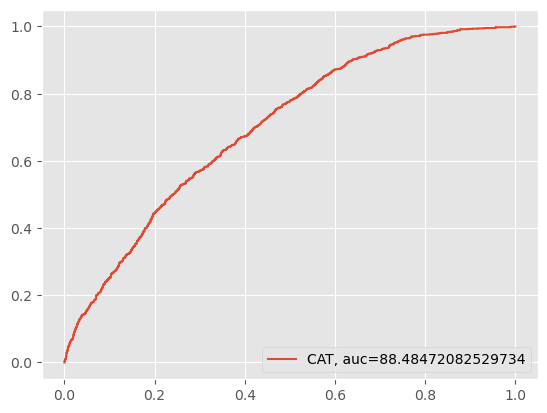

In [25]:


# CatBoostClassifier
from catboost import CatBoostRegressor, CatBoostClassifier

print("Training CatBoost Classifier models...")
for defect in target_df.columns:
    cat_clf = CatBoostClassifier()
    cat_clf.fit(x_train, y_train[defect])
    
    models[defect] = cat_clf
#     print(models[defect])
    
    cat_clf_pred = cat_clf.predict(x_test)
    cat_clf_acc = accuracy_score(y_test[defect],cat_clf_pred)
    accuracy_scores.append(100*cat_clf_acc)
    
    #Receiver Operating Characteristic(ROC) curve
    cat_clf_pred_proba = cat_clf.predict_proba(x_test)[::,1]
    fpr, tpr, thresholds = roc_curve(y_test[defect], cat_clf_pred_proba)
    auc = roc_auc_score(y_test[defect], cat_clf_pred_proba)
    roc_accuracy.append(100 * auc)
print("CatBoost models trained successfully.")

# Average AUC score
avg_auc = sum(accuracy_scores) / len(accuracy_scores)
print("Average accuracy Score of CatBoost Classifier::{:.4f}%".format(avg_auc))
avg_accuracy.append(avg_auc)

# Average Receiver Operating Characteristic(ROC) curve
avg_roc_auc = sum(roc_accuracy) / len(roc_accuracy)
avg_roc_accuracy.append(avg_roc_auc)
print("Average roc Score of CatBoost Classifier::{:.4f}%".format(avg_roc_auc))
plt.plot(fpr,tpr,label="CAT, auc="+str(avg_roc_auc))
plt.legend(loc=4)
plt.show()


In [26]:
print("Accuracy :",avg_accuracy)

Accuracy : [89.28199791883456]


In [27]:
print("ROC Accuracy :",avg_roc_accuracy)

ROC Accuracy : [88.48472082529734]


In [28]:
model_list = ['Cat Boost']

# dictionary of lists 
dict = {'Accuracy': np.round(avg_accuracy, 2), 
        'ROC accuracy': np.round(avg_roc_accuracy, 2)} 
   
result = pd.DataFrame(dict, index = model_list)
    
result

,Accuracy,ROC accuracy
Cat Boost,89.28,88.48


### Prediction on Test Data

In [29]:
test = pd.read_csv('test.csv')
test.head()

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,...,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
0,19219,1015,1033,3826564,3826588,659,23,46,62357,67,...,0.0095,0.5652,1.0000,1.0,2.8410,1.1139,1.6628,0.6727,-0.2261,0.9172
1,19220,1257,1271,419960,419973,370,26,28,39293,92,...,0.0047,0.2414,1.0000,1.0,2.5682,0.9031,1.4472,0.9063,-0.1453,0.9104
2,19221,1358,1372,117715,117724,289,36,32,29386,101,...,0.0155,0.6000,0.7500,0.0,2.4609,1.3222,1.3222,-0.5238,-0.0435,0.6514
3,19222,158,168,232415,232440,80,10,11,8586,107,...,0.0037,0.8000,1.0000,1.0,1.9031,0.6990,1.0414,0.1818,-0.0738,0.2051
4,19223,559,592,544375,544389,140,19,15,15524,103,...,0.0158,0.8421,0.5333,0.0,2.1461,1.3222,1.1461,-0.5714,-0.0894,0.4170


In [30]:
test.shape

(12814, 28)

In [31]:
test.columns

Index(['id', 'X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum',
       'Pixels_Areas', 'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas'],
      dtype='object')

In [32]:
test_col = test.columns.tolist()
test_col

['id',
 'X_Minimum',
 'X_Maximum',
 'Y_Minimum',
 'Y_Maximum',
 'Pixels_Areas',
 'X_Perimeter',
 'Y_Perimeter',
 'Sum_of_Luminosity',
 'Minimum_of_Luminosity',
 'Maximum_of_Luminosity',
 'Length_of_Conveyer',
 'TypeOfSteel_A300',
 'TypeOfSteel_A400',
 'Steel_Plate_Thickness',
 'Edges_Index',
 'Empty_Index',
 'Square_Index',
 'Outside_X_Index',
 'Edges_X_Index',
 'Edges_Y_Index',
 'Outside_Global_Index',
 'LogOfAreas',
 'Log_X_Index',
 'Log_Y_Index',
 'Orientation_Index',
 'Luminosity_Index',
 'SigmoidOfAreas']

In [33]:
ids = test['id']

In [34]:
test.drop(['id'], axis=1, inplace=True)

In [35]:
test.columns

Index(['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas',
       'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas'],
      dtype='object')

In [36]:
test.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
0,1015,1033,3826564,3826588,659,23,46,62357,67,127,...,0.0095,0.5652,1.0000,1.0,2.8410,1.1139,1.6628,0.6727,-0.2261,0.9172
1,1257,1271,419960,419973,370,26,28,39293,92,132,...,0.0047,0.2414,1.0000,1.0,2.5682,0.9031,1.4472,0.9063,-0.1453,0.9104
2,1358,1372,117715,117724,289,36,32,29386,101,134,...,0.0155,0.6000,0.7500,0.0,2.4609,1.3222,1.3222,-0.5238,-0.0435,0.6514
3,158,168,232415,232440,80,10,11,8586,107,140,...,0.0037,0.8000,1.0000,1.0,1.9031,0.6990,1.0414,0.1818,-0.0738,0.2051
4,559,592,544375,544389,140,19,15,15524,103,134,...,0.0158,0.8421,0.5333,0.0,2.1461,1.3222,1.1461,-0.5714,-0.0894,0.4170


In [37]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12814 entries, 0 to 12813
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   X_Minimum              12814 non-null  int64  
 1   X_Maximum              12814 non-null  int64  
 2   Y_Minimum              12814 non-null  int64  
 3   Y_Maximum              12814 non-null  int64  
 4   Pixels_Areas           12814 non-null  int64  
 5   X_Perimeter            12814 non-null  int64  
 6   Y_Perimeter            12814 non-null  int64  
 7   Sum_of_Luminosity      12814 non-null  int64  
 8   Minimum_of_Luminosity  12814 non-null  int64  
 9   Maximum_of_Luminosity  12814 non-null  int64  
 10  Length_of_Conveyer     12814 non-null  int64  
 11  TypeOfSteel_A300       12814 non-null  int64  
 12  TypeOfSteel_A400       12814 non-null  int64  
 13  Steel_Plate_Thickness  12814 non-null  int64  
 14  Edges_Index            12814 non-null  float64
 15  Em

In [38]:
X_test=test#.iloc[:,:].values  # only first column not inculded  X_sub

In [39]:
X_test.shape

(12814, 27)

In [40]:
# Standardize the features

X_test = scaler.transform(X_test)

In [41]:
# predict on test dataset
y_pred_proba = pd.DataFrame()
for defect, model in models.items():
#     y_pred = model.predict(X_test)
    y_pred_proba[defect] = model.predict_proba(X_test)[:,1]  
    

###### Prepare submission file

In [42]:
# Prepare submission file

Outfile_df = pd.DataFrame({'id': ids})
for defect in target_col:
    
    Outfile_df[defect] = np.round(y_pred_proba[defect],1)
    

In [43]:
# Save the predictions to a CSV file
Outfile_df.to_csv('outfile.csv', index=False)